In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy.linalg import multi_dot
from tabulate import tabulate
from scipy.stats import norm

In [2]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['lines.linewidth'] = 2.0

In [4]:
df = pd.read_csv('../python_lab-3/all_stocks.csv', parse_dates=True, index_col=0)
df.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2015-01-02,24.745993,308.519989,78.449997,523.373108,49.848572
2015-01-05,24.048864,302.190002,77.190002,512.463013,47.311428
2015-01-06,24.051123,295.290009,76.150002,500.585632,46.501431
2015-01-07,24.388374,298.420013,76.150002,499.727997,46.742859
2015-01-08,25.325426,300.459991,78.180000,501.303680,47.779999


In [5]:
df.tail(2)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2021-07-20,145.718674,3573.189941,341.660004,2622.030029,531.049988
2021-07-21,144.970901,3585.199951,346.230011,2652.010010,513.630005


In [6]:
returns = df.pct_change().dropna()

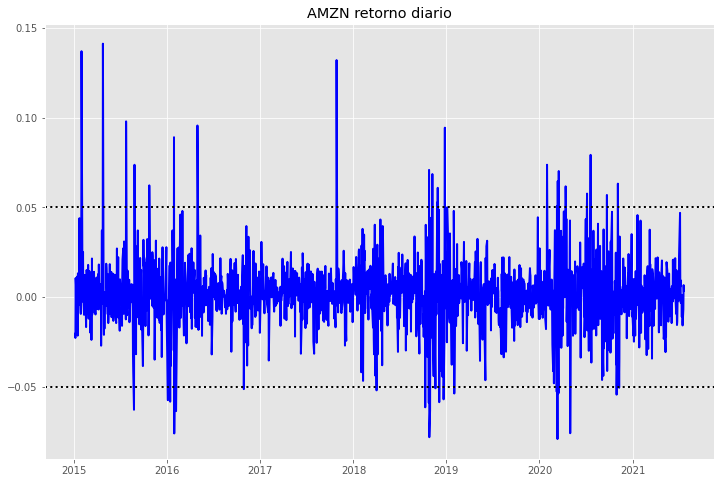

In [7]:
plt.plot(returns['AMZN'], color = 'blue')
plt.axhline(y=0.05, ls='dotted', color = 'black')
plt.axhline(y=-0.05, ls='dotted', color = 'black')
plt.title('AMZN retorno diario')
plt.grid(True)

## VaR paramétrico
A Variância-covariância é um método paramétrico que assume (quase sempre) que os retornos são normalmente distribuídos. Neste método, primeiro calculamos a média e o desvio padrão dos retornos para derivar a métrica de risco. Com base no pressuposto de normalidade, podemos generalizar

$$VaR = possition \cdot (\mu - z \cdot \sigma)$$

In [8]:
mean = np.mean(returns['AMZN'])
stddev = np.std(returns['AMZN'])

In [12]:
VaR90 = norm.ppf(1-0.90, mean,stddev)
VaR95 = norm.ppf(1-0.95,mean,stddev)
VaR99 = norm.ppf(1-0.99,mean,stddev)

In [13]:
VaR99

-0.04292831231152511

In [14]:
table = [['90%', VaR90], ['95%', VaR95], ['99%', VaR99]]
header = ['Confidence Level', 'Value At Risk']
print(tabulate(table, headers=header))


Confidence Level      Value At Risk
------------------  ---------------
90%                      -0.0228979
95%                      -0.029863
99%                      -0.0429283


In [15]:
def VaR(symbols, cl=0.95):
    mean = np.mean(returns[symbols])
    stdev = np.std(returns[symbols])
    return np.around(norm.ppf(1-cl,mean,stddev),4)

In [16]:
VaR('AAPL')

-0.0303

In [18]:
print('VaR for FAANG Stocks')
print('---'*11)
[print(f'VaR at 95% CL for {stock:4} : {VaR(stock) * 100:0.4}%')for stock in df.columns][0]


VaR for FAANG Stocks
---------------------------------
VaR at 95% CL for AAPL : -3.03%
VaR at 95% CL for AMZN : -2.99%
VaR at 95% CL for FB   : -3.04%
VaR at 95% CL for GOOG : -3.04%
VaR at 95% CL for NFLX : -2.98%


In [20]:
num_of_shares = 1000
price = df['AMZN'].iloc[-1]
position = num_of_shares *price
amzn_var = position * VaR99
print(f'Amazon Holding Value: {position}')
print(f'Amazon VaR at 99% confidence level is: {amzn_var}')


Amazon Holding Value: 3585199.951171875
Amazon VaR at 99% confidence level is: -153906.58320317083
